In [9]:
# Read the file
data = []
with open('kn.her2.all', 'r') as file:
    for line in file:
        parts = line.split()
        pair = parts[0]
        dde = float(parts[1])
        de1 = float(parts[3])
        de2 = float(parts[4])
        data.append((pair, dde, de1, de2))

for i, row in enumerate(data):
    pair, dde, de1, de2 = row
    de12 = dde + de1 + de2
    data[i] = (pair, dde, de1, de2, de12)


In [10]:
print(data[:5])

[('A1B-B2A', 0.012168, -8.38054968975, -12.211337151, -20.579718840749997), ('A1B-B2C', -0.000907891, -8.38054968975, -8.17965538055, -16.5611129613), ('A1B-B2D', 0.000124631, -8.38054968975, -8.33986726217, -16.72029232092), ('A1B-A3B', 0.00878509, -8.38054968975, -6.41973451525, -14.791499115), ('A1B-A3C', 0.00893699, -8.38054968975, -5.49322355539, -13.864836255139998)]


find five rows with dde around : -2.3, -1, 0 , 1, 6

In [17]:
# Define the target dde values and the tolerance
target_dde_values = [-2.3, -1, 0, 1, 6]
tolerance = 0.08

# Find one row for each target value
unique_rows = []
for target in target_dde_values:
    for row in data:
        if abs(row[1] - target) <= tolerance:
            unique_rows.append(row)
            break  # Stop after finding the first match

# Display the rows
for target, row in zip(target_dde_values, unique_rows):
    print(f"Row with dde value around {target}: {row}")

Row with dde value around -2.3: ('D39A-B256A', -2.31533, -4.2870167233, -2.75427107699, -9.35661780029)
Row with dde value around -1: ('B6A-D119B', -1.03091, -9.06889346242, -2.99199003726, -13.091793499680001)
Row with dde value around 0: ('A1B-B2A', 0.012168, -8.38054968975, -12.211337151, -20.579718840749997)
Row with dde value around 1: ('B2A-C124A', 1.07828, -12.211337151, -0.429158587009, -11.562215738009002)
Row with dde value around 6: ('B6A-C7B', 6.06472, -9.06889346242, -5.61920403084, -8.62337749326)


use the d12 value above as z axis

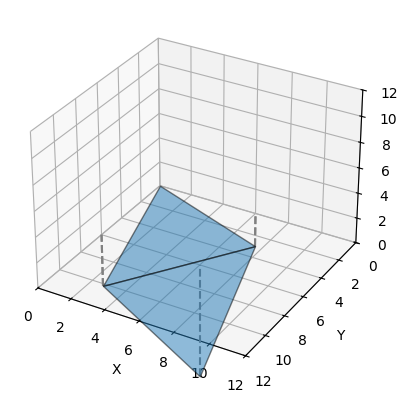

In [48]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import matplotlib.pyplot as plt

xy_base = 6
# Define the vertices of the triangle
vertices = [[0, 0, 0], [0, xy_base, -4.2870167233], [xy_base, 0, -2.75427107699]]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Add the triangle to the plot
triangle = Poly3DCollection([vertices], alpha=0.5, edgecolor='black')
ax.add_collection3d(triangle)

# Set the limits and labels
ax.set_xlim([0, 12])  # Reverse the x-axis
ax.set_ylim([12, 0])
ax.set_zlim([0, 12])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Define the vertices of the second triangle
vertices2 = [[xy_base, 0, -2.75427107699], [0, xy_base, -4.2870167233], [xy_base, xy_base, -9.35661780029]]

# Add the second triangle to the plot
triangle2 = Poly3DCollection([vertices2], alpha=0.5, edgecolor='black')
ax.add_collection3d(triangle2)
# Show the plot

# Plot straight lines from each vertex of the triangles to the xy surface
for vertex in vertices + vertices2:
    x, y, z = vertex
    ax.plot([x, x], [y, y], [z, 0], color='gray', linestyle='--')
plt.show()

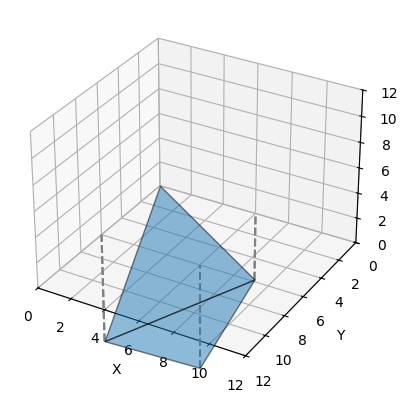

In [49]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import matplotlib.pyplot as plt

#('B6A-C7B', 6.06472, -9.06889346242, -5.61920403084, -8.62337749326)
# Define the vertices of the triangle
vertices = [[0, 0, 0], [0, xy_base, -9.06889346242], [xy_base, 0, -5.61920403084]]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Add the triangle to the plot
triangle = Poly3DCollection([vertices], alpha=0.5, edgecolor='black')
ax.add_collection3d(triangle)

# Set the limits and labels
ax.set_xlim([0, 12])  # Reverse the x-axis
ax.set_ylim([12, 0])
ax.set_zlim([0, 12])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Define the vertices of the second triangle
vertices2 = [[xy_base, 0, -5.61920403084], [0, xy_base, -9.06889346242], [xy_base, xy_base, -8.62337749326]]

# Add the second triangle to the plot
triangle2 = Poly3DCollection([vertices2], alpha=0.5, edgecolor='black')
ax.add_collection3d(triangle2)
# Show the plot

# Plot straight lines from each vertex of the triangles to the xy surface
for vertex in vertices + vertices2:
    x, y, z = vertex
    ax.plot([x, x], [y, y], [z, 0], color='gray', linestyle='--')
plt.show()